# 1. Візуалізація динаміки температури за рік
- Завдання: 
    - Побудуйте лінійний графік середньодобової температури за 12 місяців року. 
    - Дані мають бути згенеровані випадково, але з тенденцією до підвищення влітку та зниження взимку. 
    - Ускладнення: 
        - Підпишіть кожен пік/спад температури. 
        - Додайте кольорове кодування сезонів.

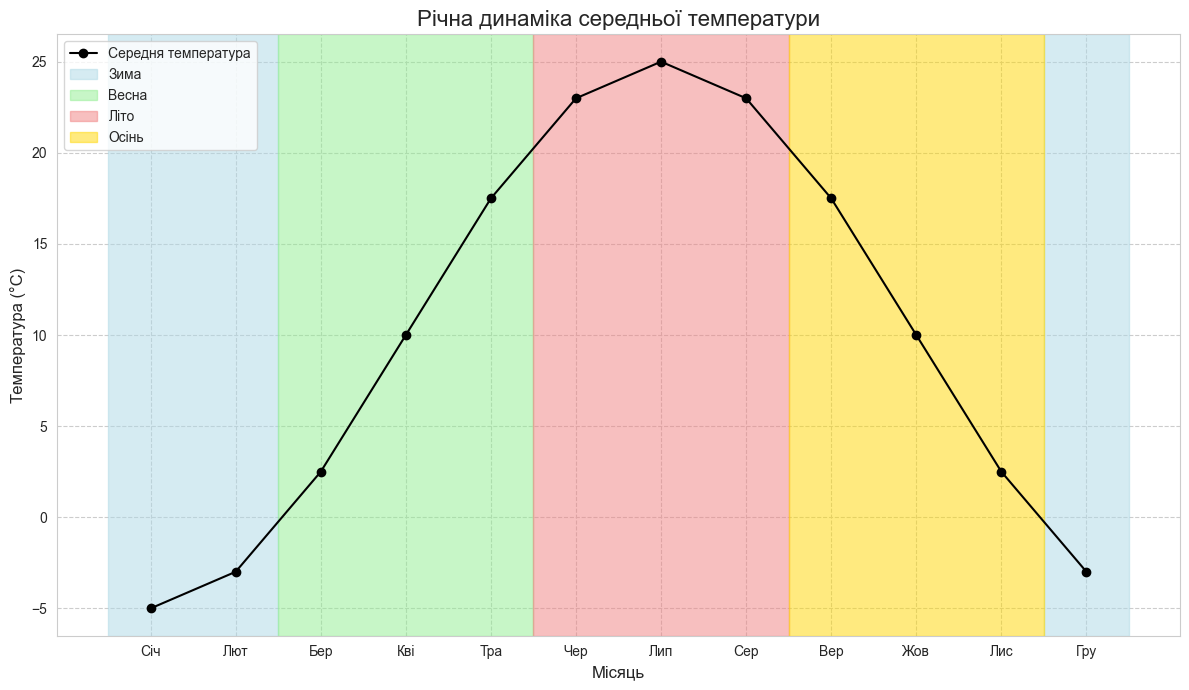

In [15]:
import numpy as np
import matplotlib.pyplot as plt

months = np.arange(1, 13)
month_names = ['Січ', 'Лют', 'Бер', 'Кві', 'Тра', 'Чер', 'Лип', 'Сер', 'Вер', 'Жов', 'Лис', 'Гру']

# Хвиля коливань за допомогою косинуса
# t = -cos() * різниця температур + середньорічна температура
temperatures = -np.cos(np.pi * (months - 1) / 6) * 15 + 10

plt.figure(figsize=(12, 7))
plt.plot(months, temperatures, marker='o', linestyle='-', color='black', label='Середня температура')

plt.axvspan(0.5, 2.5, color='lightblue', alpha=0.5, label='Зима')# Зима
plt.axvspan(11.5, 12.5, color='lightblue', alpha=0.5)# Зима
plt.axvspan(2.5, 5.5, color='lightgreen', alpha=0.5, label='Весна')# Весна
plt.axvspan(5.5, 8.5, color='lightcoral', alpha=0.5, label='Літо')# Літо
plt.axvspan(8.5, 11.5, color='gold', alpha=0.5, label='Осінь')# Осінь

plt.title('Річна динаміка середньої температури', fontsize=16)
plt.xlabel('Місяць', fontsize=12)
plt.ylabel('Температура (°C)', fontsize=12)

plt.xticks(months, month_names)
plt.grid(True, linestyle='--')
plt.legend()
plt.tight_layout()
plt.show()

# 2. Порівняння росту продажів у трьох компаніях
- Завдання: 
    - Змоделюйте місячні продажі трьох компаній протягом року. 
    - Побудуйте кілька лінійних графіків на одній осі, додайте легенду, кольорове розділення, маркери та лінії тренду. 
    - Ускладнення: 
        - Виділіть періоди з найбільшим зростанням/падінням.

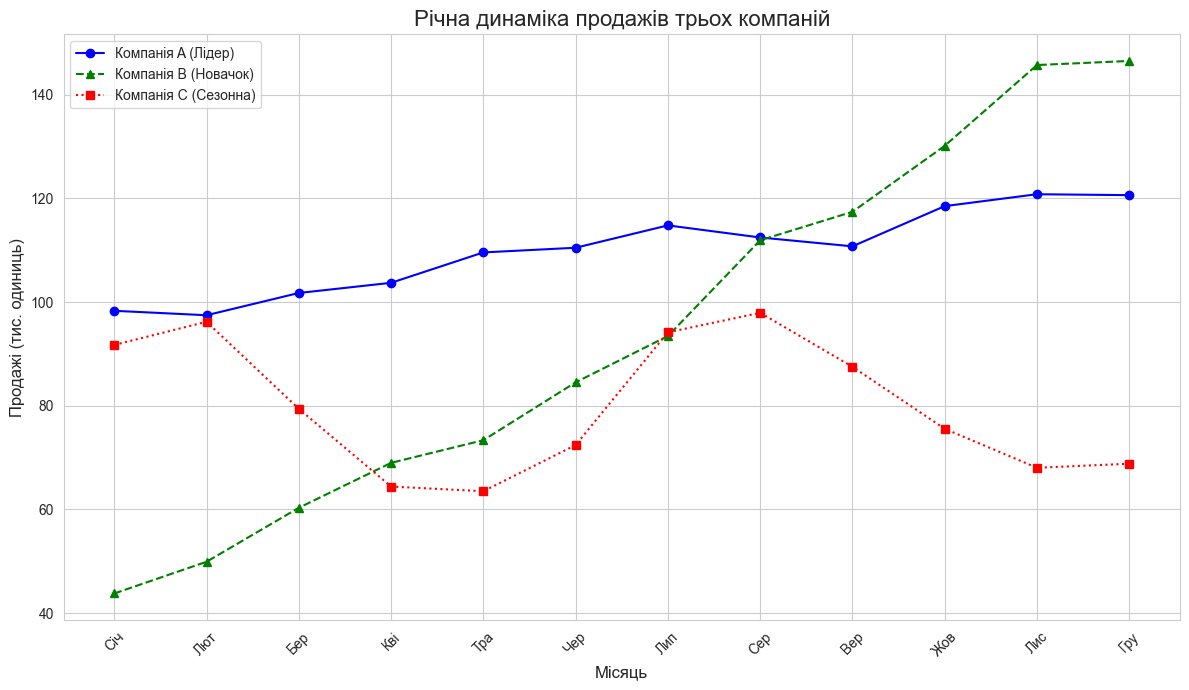

In [13]:
import numpy as np
import matplotlib.pyplot as plt

months = np.arange(1, 13)
month_names = ['Січ', 'Лют', 'Бер', 'Кві', 'Тра', 'Чер', 'Лип', 'Сер', 'Вер', 'Жов', 'Лис', 'Гру']

sales_a = np.linspace(100, 120, 12) + np.random.uniform(-5, 5, 12)   # Компанія А: Просто стабільно зростає
sales_b = 30 + months * 10 + np.random.uniform(-7, 7, 12)            # Компанія B: Швидко зростає на початку
sales_c = 80 + np.sin(months) * 15 + np.random.uniform(-5, 5, 12)   # Компанія C: Продажі коливаються протягом року

plt.figure(figsize=(12, 7))
plt.plot(months, sales_a, marker='o', linestyle='-', color='blue', label='Компанія A (Лідер)')
plt.plot(months, sales_b, marker='^', linestyle='--', color='green', label='Компанія B (Новачок)')
plt.plot(months, sales_c, marker='s', linestyle=':', color='red', label='Компанія C (Сезонна)')

plt.title('Річна динаміка продажів трьох компаній', fontsize=16)
plt.xlabel('Місяць', fontsize=12)
plt.ylabel('Продажі (тис. одиниць)', fontsize=12)
plt.xticks(months, month_names, rotation=45)

plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# 3. Аналіз оцінок студентів з кількох предметів
- Завдання: 
    - Змоделюйте 100 студентів, кожен має оцінки з 5 предметів (випадкові значення). 
    - Побудуйте boxplot для кожного предмету на одній діаграмі. 
    - Ускладнення: 
        - Додайте кольорові маркери для студентів, що вийшли за межі меж коробки (викиди).

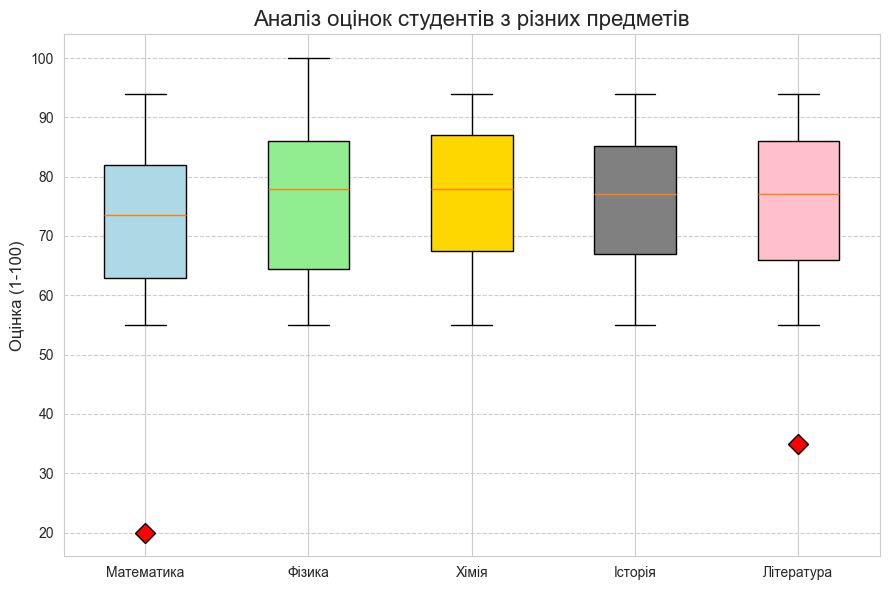

In [46]:
import numpy as np
import matplotlib.pyplot as plt


num_students = 100
subjects = ['Математика', 'Фізика', 'Хімія', 'Історія', 'Література']
np.random.seed(42)

grades_data = []
for subject in subjects:
    base_grades = np.random.randint(55, 95, size=num_students)# Оцінки
    grades_data.append(base_grades)

# Штучні викиди
grades_data[0][5] = 20  # Низька оцінка з Математики
grades_data[1][10] = 100 # Висока оцінка з Фізики
grades_data[4][15] = 35 # Низька оцінка з Літератури

plt.figure(figsize=(9, 6))
boxplot_dict = plt.boxplot(grades_data, patch_artist=True)

colors = ['lightblue', 'lightgreen', 'gold', 'grey', 'pink']
for patch, color in zip(boxplot_dict['boxes'], colors):
    patch.set_facecolor(color)
    
for flier in boxplot_dict['fliers']:
    flier.set(marker='D', markerfacecolor='red', markeredgecolor='black', markersize=10)

plt.title('Аналіз оцінок студентів з різних предметів', fontsize=16)
plt.ylabel('Оцінка (1-100)', fontsize=12)
plt.xticks(np.arange(1, len(subjects) + 1), subjects)
plt.grid(True, axis='y', linestyle='--')
plt.tight_layout()
plt.show()

# 4. Побудова щільності розподілу оцінок
- Завдання: 
    - Змоделюйте 1000 оцінок за 100-бальною шкалою. 
    - Побудуйте гістограму з накладеною кривою нормального розподілу (через scipy).
    - Ускладнення: 
        - Порахуйте середнє і дисперсію, підпишіть ці значення.

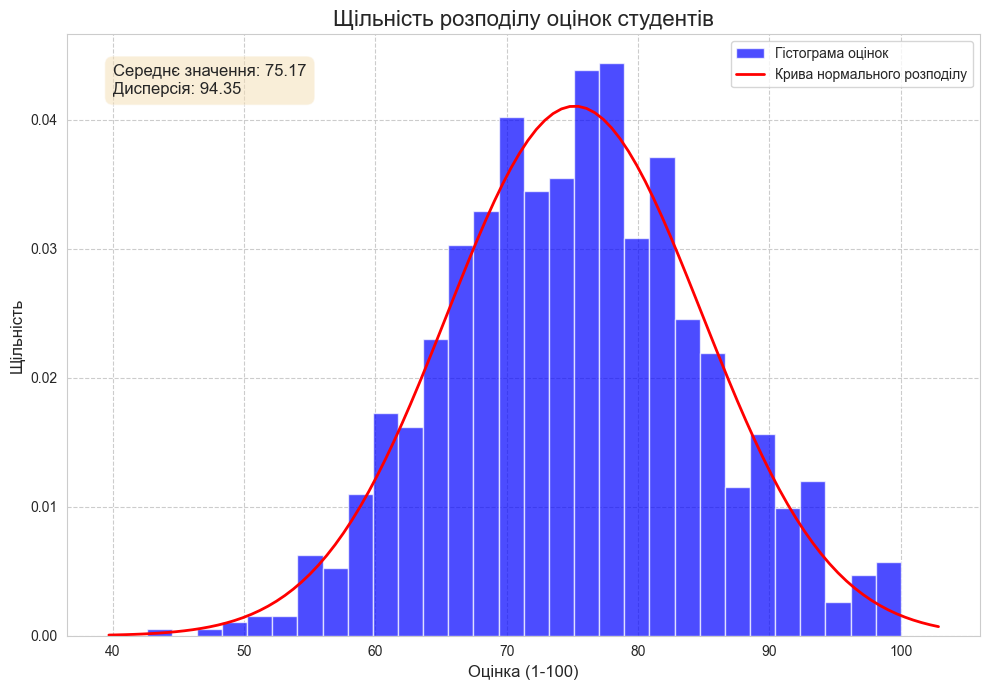

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

np.random.seed(42)
grades = np.random.normal(loc=75, scale=10, size=1000)# Оцінки
grades = np.clip(grades, 0, 100)

mean_grade = np.mean(grades)# Середнє значення
variance_grade = np.var(grades)# Дисперсія
std_grade = np.std(grades)# Середньоквадратичне відхилення 

stats_text = (f"Середнє значення: {mean_grade:.2f}\n"
              f"Дисперсія: {variance_grade:.2f}")

plt.figure(figsize=(10, 7))
plt.hist(grades, bins=30, density=True, color='blue', alpha=0.7, label='Гістограма оцінок')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mean_grade, std_grade)
plt.plot(x, p, linewidth=2, color='red', label='Крива нормального розподілу')

plt.text(0.05, 0.95, stats_text, transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', facecolor='wheat', alpha=0.5))

plt.title('Щільність розподілу оцінок студентів', fontsize=16)
plt.xlabel('Оцінка (1-100)', fontsize=12)
plt.ylabel('Щільність', fontsize=12)

plt.legend()
plt.grid(True, linestyle='--')
plt.tight_layout()
plt.show()

# 5. Аналіз структури бюджету родини
- Завдання: 
    - Створіть кругову діаграму з розподілом витрат родини (їжа, житло, транспорт, освіта, розваги, інше). 
    - Ускладнення: 
        - Відокремте найбільший сегмент (explode), додайте відсотки та підписи, що включають суму.

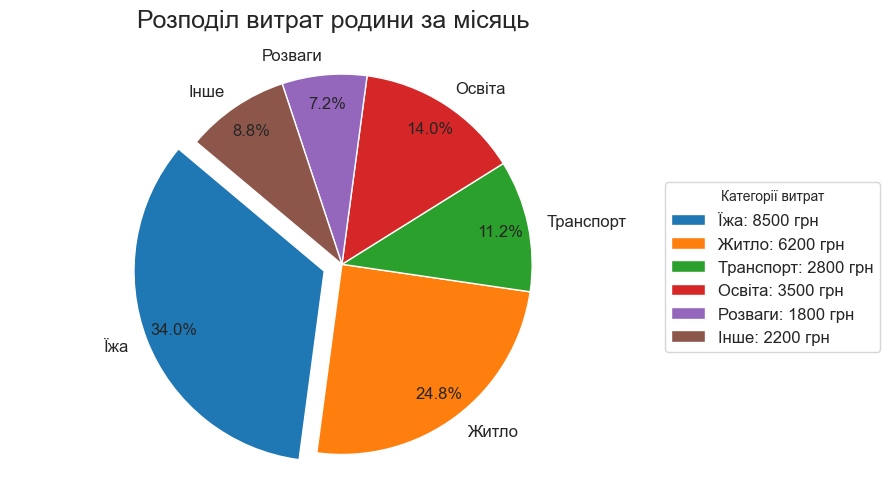

In [53]:
import numpy as np
import matplotlib.pyplot as plt

labels = np.array(['Їжа', 'Житло', 'Транспорт', 'Освіта', 'Розваги', 'Інше'])
values = np.array([8500, 6200, 2800, 3500, 1800, 2200])

explode = np.zeros(len(labels))
max_value_index = np.argmax(values)
explode[max_value_index] = 0.1

plt.figure(figsize=(9, 5))
plt.pie(values, 
        explode=explode, 
        labels=labels, 
        autopct='%1.1f%%',
        startangle=140,
        pctdistance=0.85,
        textprops={'fontsize': 12})

legend_labels = [f'{l}: {v} грн' for l, v in zip(labels, values)]
plt.legend(legend_labels, title="Категорії витрат", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), fontsize=12)

plt.title('Розподіл витрат родини за місяць', fontsize=18, pad=20)
plt.axis('equal')
plt.tight_layout()
plt.show()

# 6. Heatmap розкладу занять
- Завдання: 
    - Побудуйте heatmap розкладу для студента: 
        - дні тижня по осі X, 
        - години дня — по осі Y, 
        - значення — насиченість зайнятості (від 0 до 1). 
    - Ускладнення: 
        - Виділіть найбільш насичений день.

Аналіз: Найбільш насичений день - це Середа.


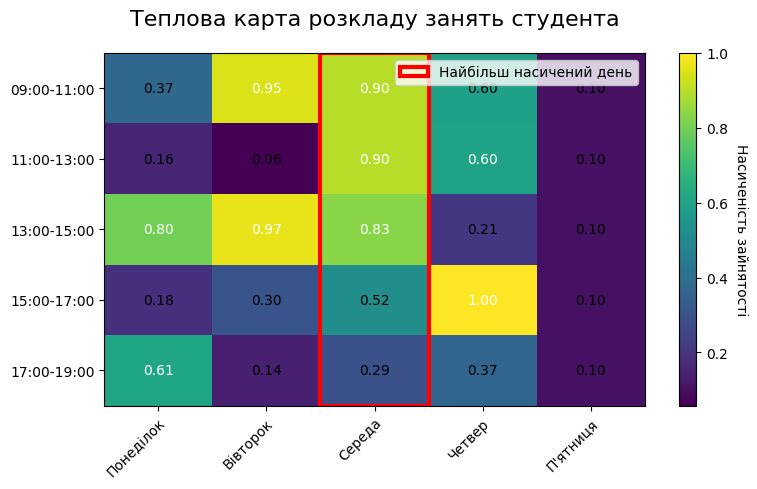

In [5]:
import numpy as np
import matplotlib.pyplot as plt

days = ['Понеділок', 'Вівторок', 'Середа', 'Четвер', 'П\'ятниця']
hours = ['09:00-11:00', '11:00-13:00', '13:00-15:00', '15:00-17:00', '17:00-19:00']

np.random.seed(42)
schedule_data = np.random.rand(len(hours), len(days))

# Штучно зробимо відхилення, більше та менше відхилення
schedule_data[2, 0] = 0.8   # Понеділок - обід
schedule_data[0:2, 2] = 0.9 # Середа - ранок
schedule_data[3, 3] = 1.0   # Четвер - найбільш насичена пара 
schedule_data[:, 4] = 0.1   # П'ятниця - легкий день

daily_load = np.sum(schedule_data, axis=0)
busiest_day_index = np.argmax(daily_load)
busiest_day_name = days[busiest_day_index]
print(f"Аналіз: Найбільш насичений день - це {busiest_day_name}.")

fig, ax = plt.subplots(figsize=(8, 5))
im = ax.imshow(schedule_data, cmap='viridis', aspect='auto')

# Кольорова шкала поруч з графіком
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel('Насиченість зайнятості', rotation=-90, va="bottom")

ax.set_xticks(np.arange(len(days)))
ax.set_yticks(np.arange(len(hours)))
ax.set_xticklabels(days)
ax.set_yticklabels(hours)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

for i in range(len(hours)):
    for j in range(len(days)):
        text_color = "black" if schedule_data[i, j] < 0.6 else "white"
        ax.text(j, i, f'{schedule_data[i, j]:.2f}',
                       ha="center", va="center", color=text_color)
        
# Виділимо рамкою найбільш насичений день
rect = plt.Rectangle((busiest_day_index - 0.5, -0.5), 1, len(hours),
                     linewidth=3, edgecolor='red', facecolor='none', label='Найбільш насичений день')
ax.add_patch(rect)


ax.set_title("Теплова карта розкладу занять студента", fontsize=16, pad=20)
ax.legend()
fig.tight_layout()
plt.show()

# 7. Динаміка зміни курсу валют
- Завдання:
    - Змоделюйте курс долара до гривні протягом 365 днів. 
    - Побудуйте лінійний графік із градієнтом (колір залежить від зміни напрямку).
    - Ускладнення: 
        - Позначте дні, де була максимальна волатильність.

--- Аналіз волатильності ---
День 181: курс змінився на 0.41 грн
День 264: курс змінився на 0.49 грн
День 211: курс змінився на 0.58 грн


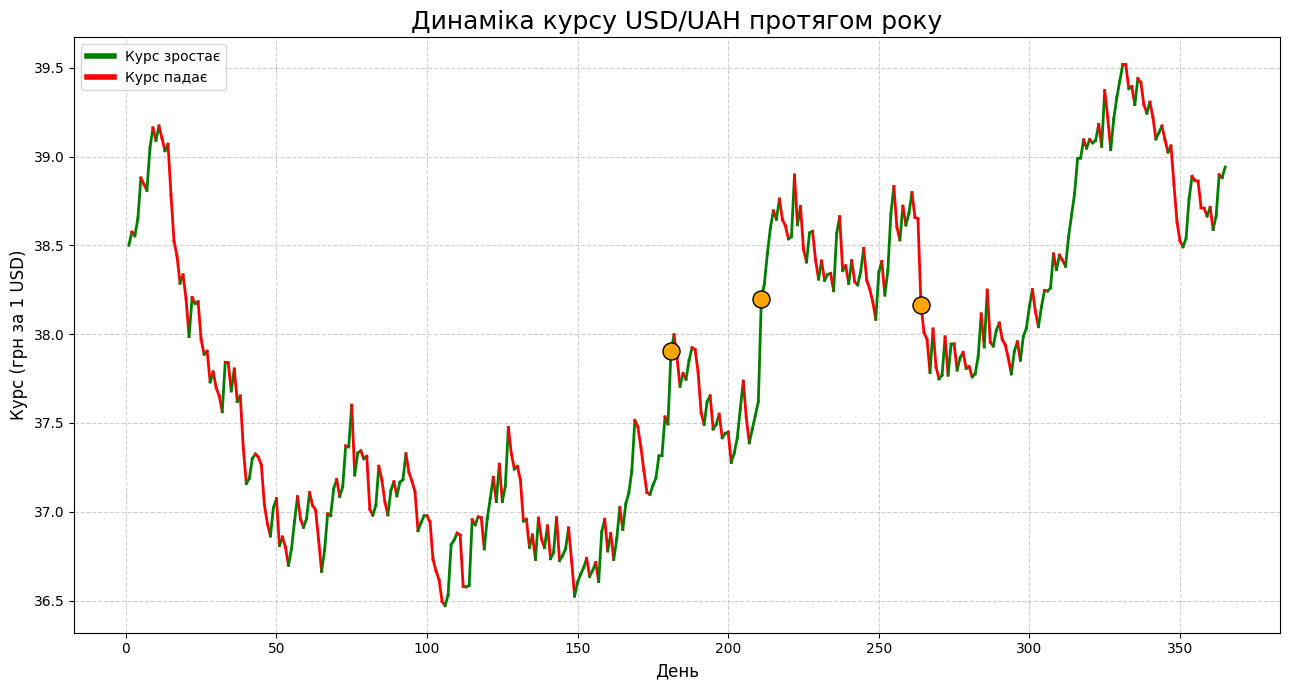

In [10]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
num_days = 365
days = np.arange(1, num_days + 1)

start_price = 38.5
daily_changes = np.random.normal(loc=0, scale=0.15, size=num_days - 1)
price_path = np.concatenate(([start_price], start_price + np.cumsum(daily_changes)))

# Визначаємо волатильність
daily_volatility = np.abs(np.diff(price_path, prepend=start_price)) 
most_volatile_days_indices = np.argsort(daily_volatility)[-3:]

print("--- Аналіз волатильності ---")
for day_idx in most_volatile_days_indices:
    print(f"День {day_idx + 1}: курс змінився на {daily_volatility[day_idx]:.2f} грн")

fig, ax = plt.subplots(figsize=(13, 7))

for i in range(1, len(price_path)):
    if price_path[i] > price_path[i-1]:
        color = 'green' # Ріст
    elif price_path[i] < price_path[i-1]:
        color = 'red'   # Падіння
    else:
        color = 'grey'  # Без змін
        
    ax.plot(days[i-1:i+1], price_path[i-1:i+1], color=color, linewidth=2)


# Дні з максимальною волатильністю 
ax.scatter(days[most_volatile_days_indices], price_path[most_volatile_days_indices],
           color='orange', s=150, zorder=5, edgecolors='black', 
           label='Максимальна волатильність')

from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='green', lw=4),
                Line2D([0], [0], color='red', lw=4)]
ax.legend(custom_lines, ['Курс зростає', 'Курс падає'], loc='upper left')

ax.set_title('Динаміка курсу USD/UAH протягом року', fontsize=18)
ax.set_xlabel('День', fontsize=12)
ax.set_ylabel('Курс (грн за 1 USD)', fontsize=12)
ax.grid(True, linestyle='--', alpha=0.6)
fig.tight_layout()

plt.show()

# 8. Побудова 3D графіку функції двох змінних
- Завдання:
    - Побудуйте 3D-графік функції z = sin(x) * cos(y) на сітці [-π; π].
    - Ускладнення:
          - Додайте підписані осі та кольорове кодування висоти z.

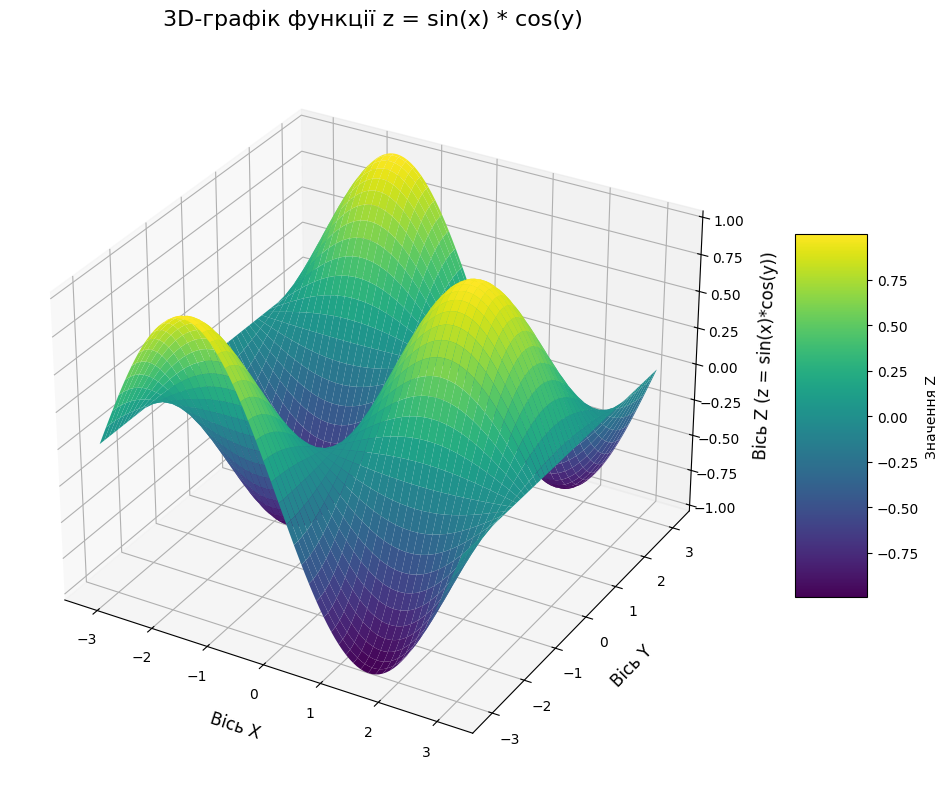

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm 

x = np.linspace(-np.pi, np.pi, 100)
y = np.linspace(-np.pi, np.pi, 100)
X, Y = np.meshgrid(x, y)
Z = np.sin(X) * np.cos(Y)


fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap=cm.viridis, edgecolor='none')

ax.set_xlabel('Вісь X', fontsize=12, labelpad=10)
ax.set_ylabel('Вісь Y', fontsize=12, labelpad=10)
ax.set_zlabel('Вісь Z (z = sin(x)*cos(y))', fontsize=12, labelpad=10)
ax.set_title('3D-графік функції z = sin(x) * cos(y)', fontsize=16, pad=20)

fig.colorbar(surf, shrink=0.5, aspect=5, label='Значення Z')
fig.tight_layout()
plt.show()

# 9. Анімований графік накопичення доходів
- Завдання:
    - Створіть анімацію, яка показує накопичення доходів за місяцями.
    - Ускладнення: 
        - На кожному кадрі показуйте загальну суму.

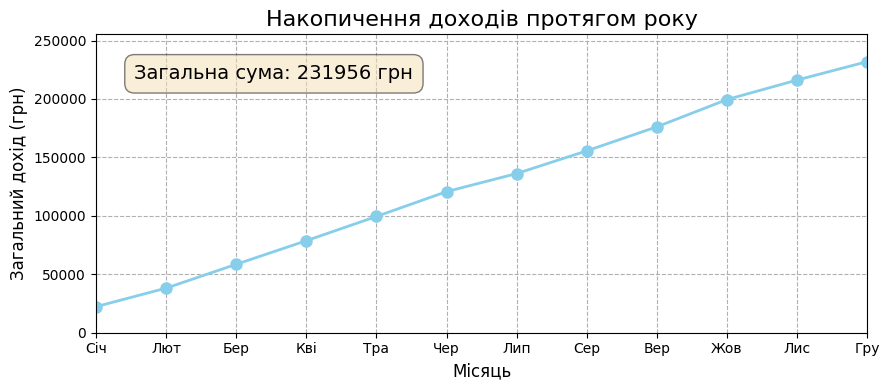

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

np.random.seed(42)
num_months = 12
months = np.arange(1, num_months + 1)
month_names = ['Січ', 'Лют', 'Бер', 'Кві', 'Тра', 'Чер', 'Лип', 'Сер', 'Вер', 'Жов', 'Лис', 'Гру']

monthly_income = np.random.randint(15000, 25000, size=num_months)# щомісячний дохід
cumulative_income = np.cumsum(monthly_income)


fig, ax = plt.subplots(figsize=(9, 4))
line, = ax.plot([], [], marker='o', linestyle='-', color='skyblue', linewidth=2, markersize=8, animated=True)
total_text = ax.text(0.05, 0.9, '', transform=ax.transAxes, fontsize=14, 
                     verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', facecolor='wheat', alpha=0.5),
                     animated=True)

ax.set_xlim(1, num_months)
ax.set_ylim(0, cumulative_income.max() * 1.1)


ax.set_title("Накопичення доходів протягом року", fontsize=16)
ax.set_xlabel("Місяць", fontsize=12)
ax.set_ylabel("Загальний дохід (грн)", fontsize=12)
ax.set_xticks(months)
ax.set_xticklabels(month_names)
ax.grid(True, linestyle='--')


def init():
    line.set_data([], [])
    total_text.set_text('')
    return line, total_text

def update(frame):
    x_data = months[:frame + 1]
    y_data = cumulative_income[:frame + 1]
    line.set_data(x_data, y_data)
    
    current_total = cumulative_income[frame]
    total_text.set_text(f'Загальна сума: {current_total} грн')    
    return line, total_text


ani = FuncAnimation(fig, update, frames=num_months, init_func=init, interval=500, blit=True)
plt.tight_layout()
HTML(ani.to_jshtml())

# 10. Побудова порівняльного графіку кількох груп
- Завдання:
    - Змоделюйте результати опитування задоволення клієнтів у трьох групах (A, B, C).
    - Побудуйте bar-plot із групуванням, по одному бару на кожну групу на категорію (наприклад, “Якість”, “Швидкість”, “Підтримка”).
    - Ускладнення:
        - Застосуйте кольорову палітру та додайте підписи на кожен bar.

--- Згенеровані дані (середні оцінки) ---
Група A: [6.7 9.3 8.3 7.7]
Група B: [5.7 5.7 5.3 8.9]
Група C: [7.7 8.2 5.1 9.4]


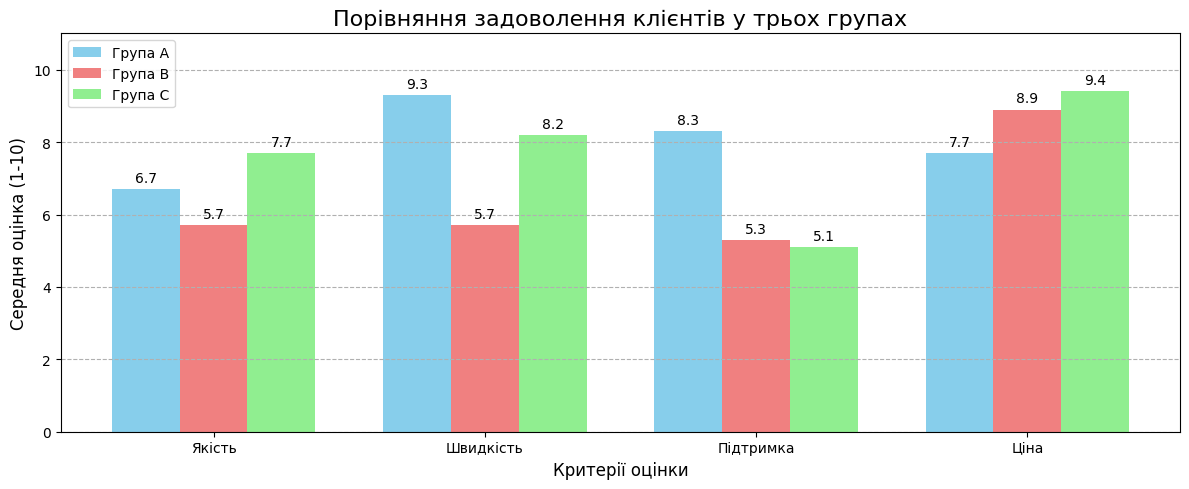

In [8]:
import numpy as np
import matplotlib.pyplot as plt

categories = ['Якість', 'Швидкість', 'Підтримка', 'Ціна']
groups = ['Група A', 'Група B', 'Група C']
num_categories = len(categories)
num_groups = len(groups)

np.random.seed(42)
survey_results = np.random.uniform(low=5.0, high=9.5, size=(num_groups, num_categories))
survey_results = np.round(survey_results, 1)

print("--- Згенеровані дані (середні оцінки) ---")
for i, group in enumerate(groups):
    print(f"{group}: {survey_results[i]}")


x = np.arange(num_categories)
width = 0.25
offsets = [-width, 0, width]
colors = ['skyblue', 'lightcoral', 'lightgreen']


fig, ax = plt.subplots(figsize=(12, 5))
for i, group in enumerate(groups):
    position = x + offsets[i]
    data = survey_results[i]
    bars = ax.bar(position, data, width, label=group, color=colors[i])
    ax.bar_label(bars, padding=3, fontsize=10)

ax.set_title('Порівняння задоволення клієнтів у трьох групах', fontsize=16)
ax.set_xlabel('Критерії оцінки', fontsize=12)
ax.set_ylabel('Середня оцінка (1-10)', fontsize=12)

ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.set_ylim(0, 11)

ax.legend()
ax.grid(True, axis='y', linestyle='--')
fig.tight_layout()
plt.show()

# 11. Побудова графіка відсоткового росту
- Завдання:
    - Порівняйте темпи росту двох продуктів (A, B) у відсотках до попереднього місяця. 
    - Побудуйте графік з second y-axis (дві осі Y).
    - Ускладнення: 
        - Підпишіть ключові зміни, зробіть Y вісь з логарифмічною шкалою.

Ключова зміна: Найбільший ріст для Продукту B був у місяці 'Кві' (+202.4%)


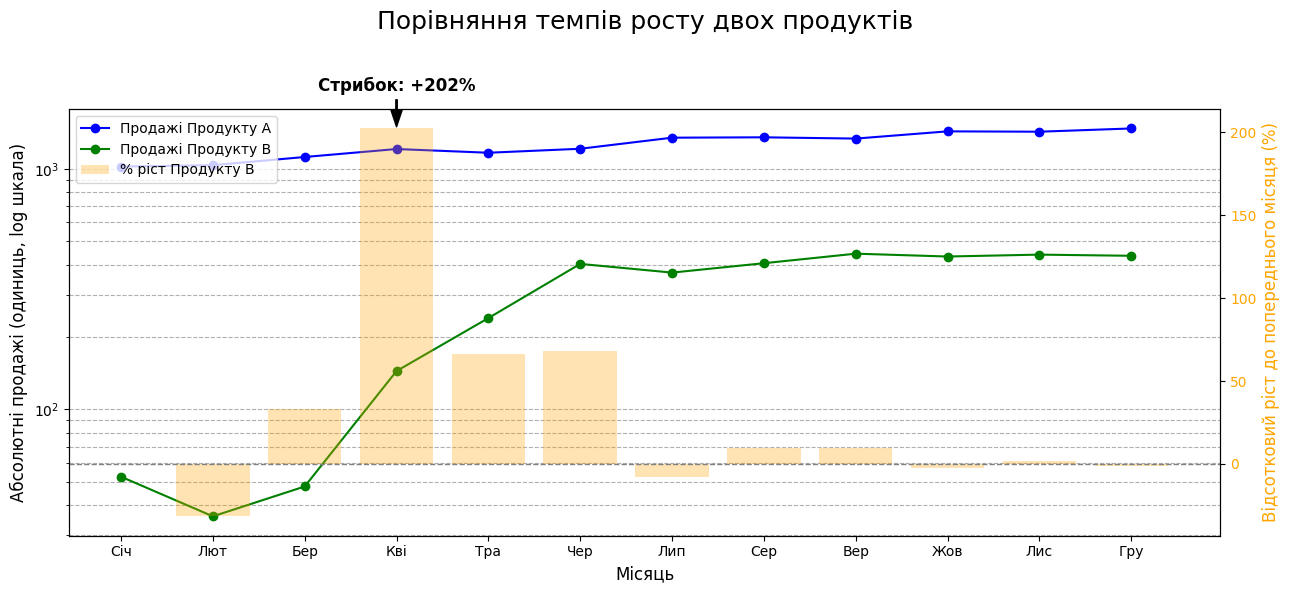

In [12]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
months = np.arange(1, 13)
month_names = ['Січ', 'Лют', 'Бер', 'Кві', 'Тра', 'Чер', 'Лип', 'Сер', 'Вер', 'Жов', 'Лис', 'Гру']

# Продукт A
sales_a = np.linspace(1000, 1500, 12) + np.random.normal(0, 50, 12)
# Продукт B
sales_b = np.array([50, 55, 65, 150, 250, 400, 380, 420, 430, 435, 440, 450]) + np.random.normal(0, 10, 12)


# Формула відсоткового росту: (поточний_місяць - попередній_місяць) / попередній_місяць * 100
percent_growth_a = np.diff(sales_a) / sales_a[:-1] * 100
percent_growth_b = np.diff(sales_b) / sales_b[:-1] * 100


key_change_month_index = np.argmax(percent_growth_b)
key_month_number = key_change_month_index + 2
key_month_name = month_names[key_change_month_index + 1]
key_growth_value = percent_growth_b[key_change_month_index]
print(f"Ключова зміна: Найбільший ріст для Продукту B був у місяці '{key_month_name}' (+{key_growth_value:.1f}%)")


fig, ax1 = plt.subplots(figsize=(13, 6))

ax1.set_yscale('log')
ax1.plot(months, sales_a, color='blue', marker='o', linestyle='-', label='Продажі Продукту A')
ax1.plot(months, sales_b, color='green', marker='o', linestyle='-', label='Продажі Продукту B')

ax1.set_xlabel('Місяць', fontsize=12)
ax1.set_ylabel('Абсолютні продажі (одиниць, log шкала)', color='black', fontsize=12)
ax1.tick_params(axis='y', labelcolor='black')
ax1.grid(True, which='both', linestyle='--', axis='y')

ax2 = ax1.twinx()
ax2.bar(months[1:], percent_growth_b, alpha=0.3, color='orange', label='% ріст Продукту B')

ax2.set_ylabel('Відсотковий ріст до попереднього місяця (%)', color='orange', fontsize=12)
ax2.tick_params(axis='y', labelcolor='orange')
ax2.axhline(0, color='grey', linestyle='--', linewidth=1)

ax2.annotate(f'Стрибок: +{key_growth_value:.0f}%',
             xy=(key_month_number, key_growth_value),
             xytext=(key_month_number, key_growth_value + 20),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8),
             ha='center', va='bottom', fontsize=12, weight='bold')


fig.suptitle('Порівняння темпів росту двох продуктів', fontsize=18)
ax1.set_xticks(months)
ax1.set_xticklabels(month_names)

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

fig.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# 12. Побудова графіка з confidence interval
- Завдання:
    - Побудуйте середнє значення певного показника по місяцях та інтервал довіри (mean ± std).
    - Ускладнення: 
        - Використовуйте fill_between для візуалізації меж.

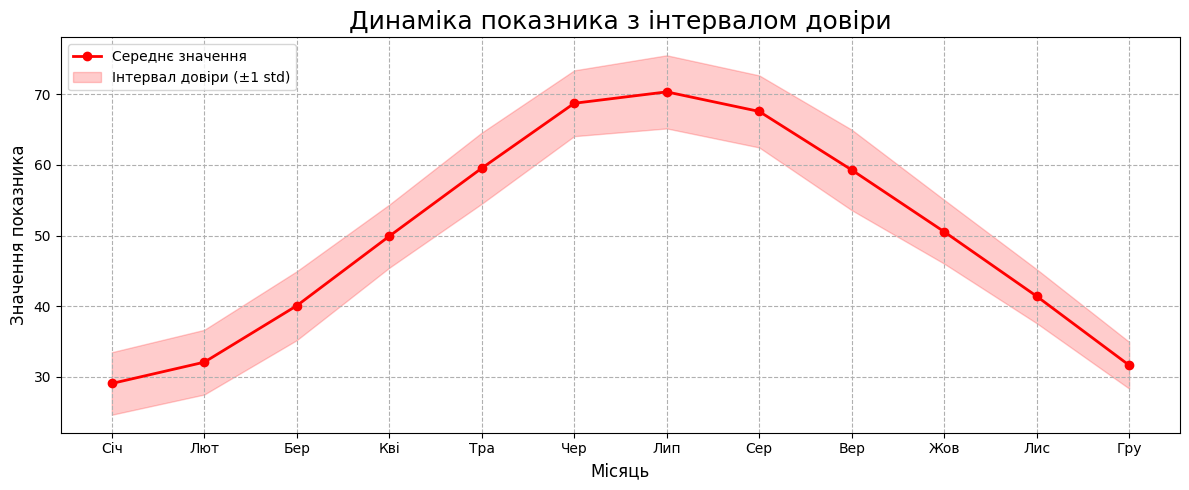

In [15]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
num_months = 12
months = np.arange(1, num_months + 1)
month_names = ['Січ', 'Лют', 'Бер', 'Кві', 'Тра', 'Чер', 'Лип', 'Сер', 'Вер', 'Жов', 'Лис', 'Гру']

daily_data_matrix = []
for month in months:
    base_level = 50 - np.cos(np.pi * (month - 1) / 6) * 20
    daily_values = np.random.normal(loc=base_level, scale=5, size=30)
    daily_data_matrix.append(daily_values)

daily_data_matrix = np.array(daily_data_matrix)
monthly_mean = np.mean(daily_data_matrix, axis=1)
monthly_std = np.std(daily_data_matrix, axis=1)

upper_bound = monthly_mean + monthly_std
lower_bound = monthly_mean - monthly_std


fig, ax = plt.subplots(figsize=(12, 5))

ax.plot(months, monthly_mean, color='red', marker='o', linestyle='-', linewidth=2, label='Середнє значення')
ax.fill_between(months, lower_bound, upper_bound, color='red', alpha=0.2, label='Інтервал довіри (±1 std)')

ax.set_title('Динаміка показника з інтервалом довіри', fontsize=18)
ax.set_xlabel('Місяць', fontsize=12)
ax.set_ylabel('Значення показника', fontsize=12)
ax.set_xticks(months)
ax.set_xticklabels(month_names)

ax.legend(loc='upper left')
ax.grid(True, linestyle='--')
fig.tight_layout()
plt.show()

# 13. Побудова календарної heatmap активності
- Завдання:
    - Змоделюйте активність користувача (кількість подій на день протягом року) та побудуйте календарну heatmap як у GitHub contributions.
    - Ускладнення: 
        - Виділіть дні з аномаліями (надто висока або низька активність).

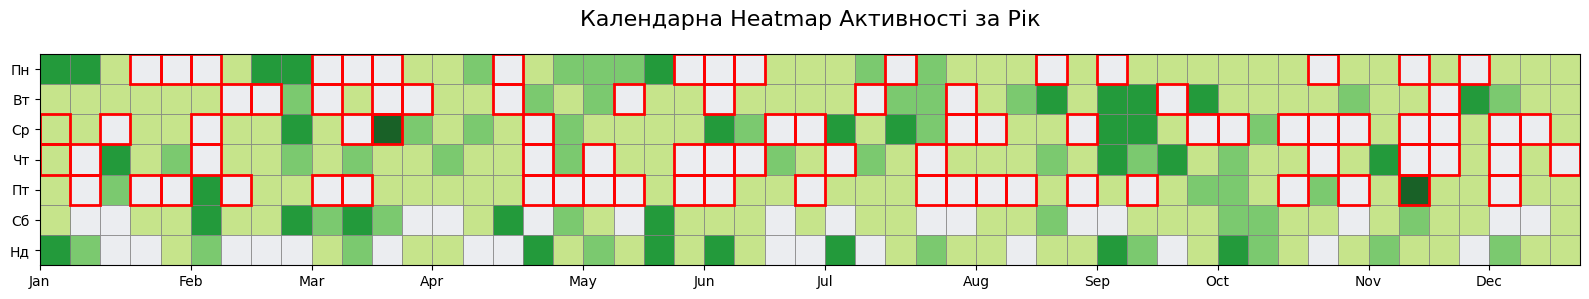

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

np.random.seed(42)

dates = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')
possible_values = np.arange(0, 15)
probabilities = [0.3, 0.2, 0.1, 0.1, 0.05, 0.05, 0.04, 0.03, 0.02, 0.01, 0.005, 0.005, 0.005, 0.005, 0.08] 
activity = np.random.choice(
    possible_values, 
    size=len(dates), 
    p=probabilities
)

# значення - активність, індекс - це дата
activity_series = pd.Series(activity, index=dates)

# Створимо певні відхилення
activity_series['2023-03-15'] = 50  # Надто висока
activity_series['2023-07-20'] = 0   # Нульова в активний період
activity_series['2023-11-10'] = 45  # Ще одна висока

calendar_data = pd.DataFrame({
    'week': dates.isocalendar().week,
    'day_of_week': dates.weekday, # 0=Пн, 1=Вт, ..., 6=Нд
    'activity': activity_series
})
# Номера тижнів 
if 52 in calendar_data['week'].values and 1 in calendar_data['week'].values:
    calendar_data.loc[calendar_data['week'] > 50, 'week'] = 0

anomalies = calendar_data[
    (calendar_data['activity'] > 30) | 
    ((calendar_data['activity'] == 0) & (calendar_data['day_of_week'] < 5)) 
]

fig, ax = plt.subplots(figsize=(16, 4))

for index, row in calendar_data.iterrows():
    week_num = row['week']
    day_of_week = row['day_of_week']
    
    activity_level = row['activity']
    if activity_level == 0: color = '#ebedf0'
    elif activity_level < 5: color = '#c6e48b'
    elif activity_level < 10: color = '#7bc96f'
    elif activity_level < 20: color = '#239a3b'
    else: color = '#196127'
        
    rect = Rectangle((week_num, day_of_week), 1, 1, facecolor=color, edgecolor='grey', linewidth=0.5)
    ax.add_patch(rect)

# аномалії з червоною рамкою
for index, row in anomalies.iterrows():
    week_num = row['week']
    day_of_week = row['day_of_week']
    rect = Rectangle((week_num, day_of_week), 1, 1, 
                     edgecolor='red', facecolor='none', linewidth=2)
    ax.add_patch(rect)

ax.set_title('Календарна Heatmap Активності за Рік', fontsize=16, pad=20)
ax.set_xlim(0, calendar_data['week'].max() + 1)
ax.set_ylim(0, 7)
ax.set_yticks(np.arange(7) + 0.5)
ax.set_yticklabels(['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Нд'])
ax.invert_yaxis()

month_starts = pd.date_range(start='2023-01-01', end='2023-12-31', freq='MS')
month_weeks = month_starts.isocalendar().week.values
month_names = month_starts.strftime('%b')

if month_weeks[0] > 50:
    month_weeks[0] = 0
ax.set_xticks(month_weeks)
ax.set_xticklabels(month_names)

ax.set_aspect('equal', adjustable='box')
plt.tight_layout()
plt.show()

# 14. Аналіз результатів екзамену за категоріями
- Завдання:
    - Результати 200 студентів мають бути розбиті по категоріях (A, B, C, D, F).
    - Побудуйте bar chart частоти.
    - Ускладнення:
        - Розфарбуйте кожну категорію відповідно до “оцінки” (зелений для A, червоний для F).

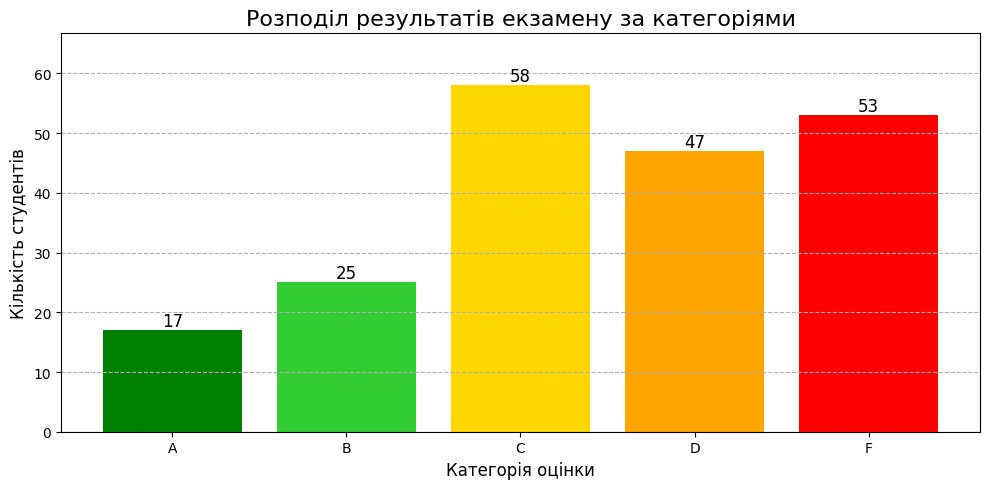

In [21]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

scores = np.random.normal(loc=70, scale=15, size=200)
scores = np.clip(scores, 0, 100)

def get_grade_category(score):
    if score >= 90: return 'A'
    if score >= 80: return 'B'
    if score >= 70: return 'C'
    if score >= 60: return 'D'
    return 'F'

vectorized_get_grade = np.vectorize(get_grade_category)
categories = vectorized_get_grade(scores)

grade_order = ['A', 'B', 'C', 'D', 'F']
unique_categories, counts = np.unique(categories, return_counts=True)
category_counts = dict(zip(unique_categories, counts))
final_counts = [category_counts.get(cat, 0) for cat in grade_order]

fig, ax = plt.subplots(figsize=(10, 5))
colors = {'A': 'green', 'B': 'limegreen', 'C': 'gold', 'D': 'orange', 'F': 'red'}
bar_colors = [colors[cat] for cat in grade_order]
bars = ax.bar(grade_order, final_counts, color=bar_colors)

ax.bar_label(bars, fontsize=12)
ax.set_title('Розподіл результатів екзамену за категоріями', fontsize=16)
ax.set_xlabel('Категорія оцінки', fontsize=12)
ax.set_ylabel('Кількість студентів', fontsize=12)
ax.set_ylim(0, max(final_counts) * 1.15)
ax.grid(True, axis='y', linestyle='--')
fig.tight_layout()
plt.show()

# 15. Побудова графіка кумулятивної суми
- Завдання:
    - Змоделюйте витрати користувача за місяць по днях, побудуйте графік кумулятивної суми витрат.
    - Ускладнення: 
        - Додайте горизонтальні лінії на рівнях бюджетних меж і підпишіть їх.

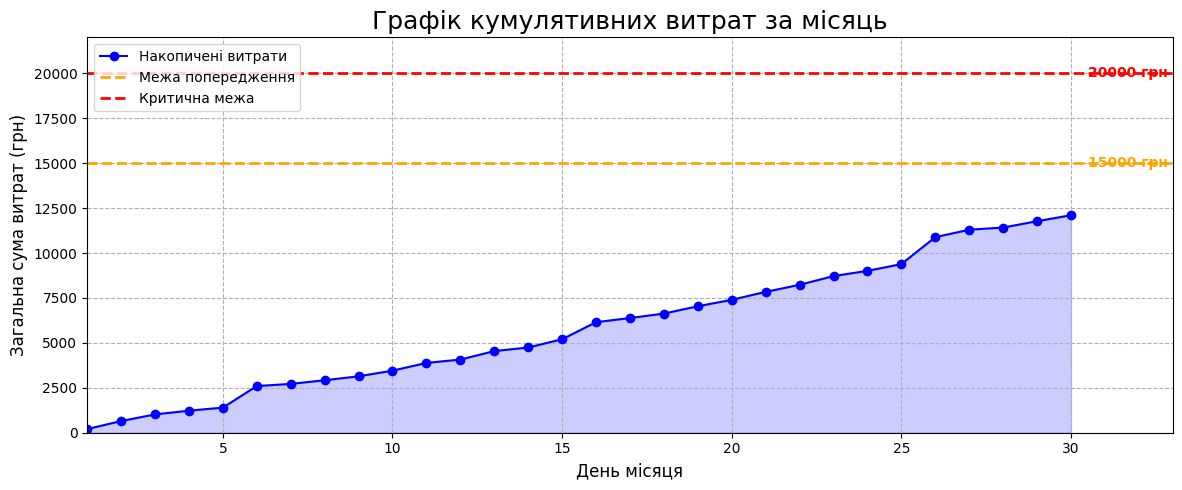

In [25]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
num_days = 30
days = np.arange(1, num_days + 1)

# випадкові щоденні витрати (в гривнях)
daily_expenses = np.random.randint(100, 500, size=num_days)
# Кілька днів з великими витратами
daily_expenses[5] = 1200
daily_expenses[15] = 950
daily_expenses[25] = 1500

cumulative_expenses = np.cumsum(daily_expenses)

budget_limit_warning = 15_000 # "Жовтий" рівень - попередження
budget_limit_critical = 20_000 # "Червоний" рівень - критична межа

fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(days, cumulative_expenses, marker='o', linestyle='-', color='blue', label='Накопичені витрати')
ax.fill_between(days, cumulative_expenses, alpha=0.2, color='blue')

ax.axhline(y=budget_limit_warning, color='orange', linestyle='--', linewidth=2, label='Межа попередження')
ax.text(num_days + 0.5, budget_limit_warning, f'{budget_limit_warning} грн', 
        color='orange', va='center', ha='left', weight='bold')

ax.axhline(y=budget_limit_critical, color='red', linestyle='--', linewidth=2, label='Критична межа')
ax.text(num_days + 0.5, budget_limit_critical, f'{budget_limit_critical} грн', 
        color='red', va='center', ha='left', weight='bold')

ax.set_title('Графік кумулятивних витрат за місяць', fontsize=18)
ax.set_xlabel('День місяця', fontsize=12)
ax.set_ylabel('Загальна сума витрат (грн)', fontsize=12)

ax.set_xlim(1, num_days + 3)
ax.set_ylim(0, max(cumulative_expenses.max(), budget_limit_critical) * 1.1)

ax.legend(loc='upper left')
ax.grid(True, linestyle='--')
fig.tight_layout()
plt.show()